<h2 style="font-family: 'Arial', sans-serif; text-align: center; color: #4B8BBE;">
    🔍 Khai phá luật kết hợp trong phân tích hành vi khách hàng
</h2>


In [27]:
#Khai báo các thư viện 
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import redshift_connector

conn = redshift_connector.connect(
    host     = "datnvn.870889396351.us-east-1.redshift-serverless.amazonaws.com",
    port     = 5439,
    database = "dev",
    user     = "admin",
    password  = 'Datn1234'
)

cursor = conn.cursor()
cursor.execute("SELECT b.madh, s.tensp, b.soluong  FROM  Fact_BanHang b join Dim_SanPham s   ON b.masp = s.masp ")
# Directly fetch the results as a pandas DataFrame
df = cursor.fetch_dataframe()
df.head(5)

c:\Users\ADMIN\anaconda3\Lib\site-packages\redshift_connector\core.py:654: DeprecationWarning:

ssl.SSLContext() without protocol argument is deprecated.

c:\Users\ADMIN\anaconda3\Lib\site-packages\redshift_connector\core.py:654: DeprecationWarning:

ssl.PROTOCOL_TLS is deprecated



,madh,tensp,soluong
0,ĐH5965450,Phần mềm Win Pro 10 SNGL Upgrd OLP NL FQC-09525,6
1,ĐH1173864,Dịch vụ bảo hành mở rộng hai năm cho Laptop De...,8
2,ĐH6526583,Dịch vụ bảo hành mở rộng hai năm cho Laptop De...,8
3,ĐH4243666,Máy tính chủ HP DL 380 G9 CTO 2xE5-2660V3(2.6G...,3
4,ĐH1911811,Laptop Dell Latitude 3440 Corei5 (L4I5H005),9


<h2 style="font-family: 'Arial', sans-serif;">
    🔄 Khám phá và Tiền xử lý dữ liệu
</h2>


In [28]:
# Hiển thị số lượng bản ghi, các cột dữ liệu và kiểu dữ liệu của cột tương ứng
print("Số lượng bản ghi:", len(df))
print("\nCác cột dữ liệu:", list(df.columns))
print("\nKiểu dữ liệu của các cột: \n",df.dtypes)

Số lượng bản ghi: 29129

Các cột dữ liệu: ['madh', 'tensp', 'soluong']

Kiểu dữ liệu của các cột: 
 madh       object
tensp      object
soluong     int64
dtype: object


In [29]:
#Số lượng sản phẩm công ty cung cấp
sl_hang= df['tensp'].nunique()
print("Số lượng sản phẩm của công ty là :", sl_hang)
#Số lượng giao dịch
sl_giaodich= df['madh'].nunique()
print("\nSố lượng giao dịch là :", sl_giaodich)

Số lượng sản phẩm của công ty là : 784

Số lượng giao dịch là : 9796


In [30]:
#Chuẩn hóa tên sản phẩm
df['tensp'] = df['tensp'].apply(lambda x: ' '.join(x.split()[:4]))
df

,madh,tensp,soluong
0,ĐH5965450,Phần mềm Win Pro,6
1,ĐH1173864,Dịch vụ bảo hành,8
2,ĐH6526583,Dịch vụ bảo hành,8
3,ĐH4243666,Máy tính chủ HP,3
4,ĐH1911811,Laptop Dell Latitude 3440,9
...,...,...,...
29124,ĐH7273877,Bộ nhớ trong Kingston,3
29125,ĐH5412954,Máy tính xách tay,5
29126,ĐH7121478,Phần mềm Product Design,6
29127,ĐH9352026,Máy tính xách tay,9


In [31]:
# Nhóm theo 'Mã Sản Phẩm' và 'Sản phẩm' để tính tổng 'Số lượng bán' cho mỗi sản phẩm
grouped_data = df.groupby(['tensp']).agg({'soluong': 'sum'}).reset_index()

# Sắp xếp theo 'Số lượng bán' giảm dần và lấy 30 sản phẩm bán chạy nhất
top_20_products = grouped_data.sort_values(by='soluong', ascending=False).head(20)


# Tạo treemap
fig = px.treemap(top_20_products,
                 path=['tensp'],  # Hiển thị tên sản phẩm trong treemap
                 values='soluong',  # Số lượng bán làm giá trị cho kích thước
                 color='soluong',  # Màu sắc theo số lượng bán
                 color_continuous_scale='Blues',  # Dải màu cho biểu đồ
                 title="Top 30 Sản Phẩm Bán Chạy Nhất"
)
fig.update_layout(
    margin={"t": 40, "l": 40, "b": 0, "r": 660},  # Điều chỉnh margin để hiển thị 3 hàng
)
# Hiển thị biểu đồ
fig.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\ADMIN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



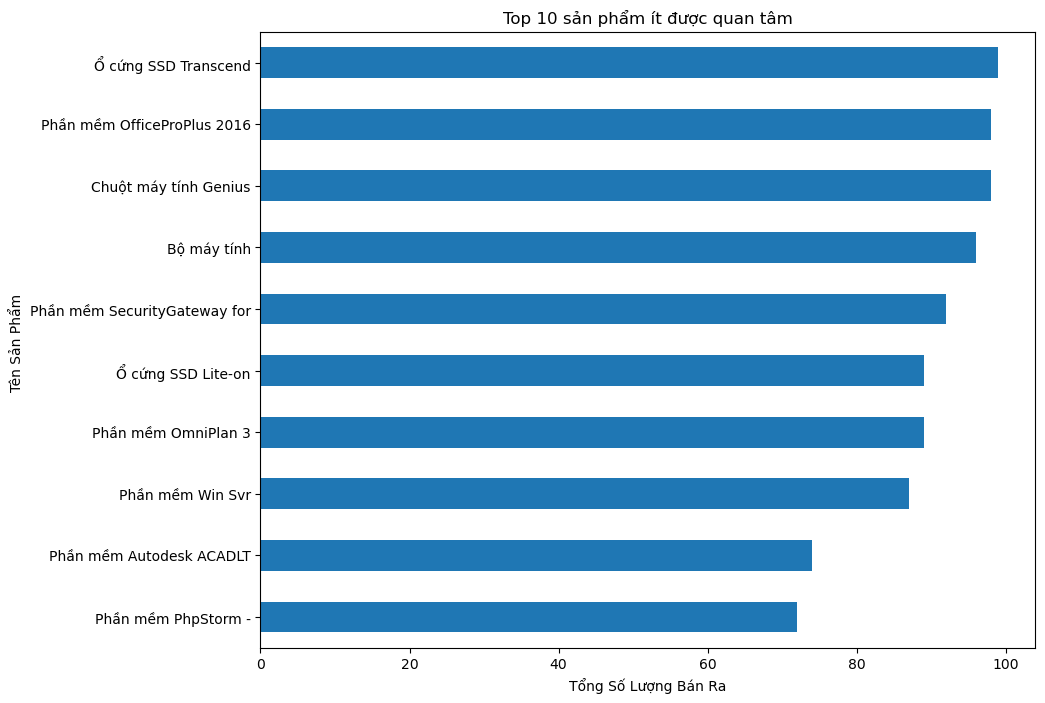

In [32]:
from matplotlib import pyplot as plt

# Nhóm dữ liệu theo 'Sản Phẩm' và tính tổng 'Số Lượng'
data_sum = df.groupby("tensp")["soluong"].sum().sort_values(ascending=True)

# Lấy 10 sản phẩm có số lượng bán thấp nhất (ít được quan tâm)
top_10_items = data_sum.head(10)

top_10_items.index = top_10_items.index.str[:38]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
top_10_items.plot(kind='barh')
plt.title('Top 10 sản phẩm ít được quan tâm')
plt.xlabel('Tổng Số Lượng Bán Ra')
plt.ylabel('Tên Sản Phẩm ')
plt.show()

In [33]:
# Chuyển dữ liệu về dạng ma trận phục vụ cho xây dụng mô hình
basket= (df.groupby(['madh','tensp'])['soluong']
        .sum().unstack().reset_index().fillna(0)
        .set_index('madh'))
# Định nghĩa một hàm để chuyển đổi dữ liệu thành kiểu true false
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
# Chuyển đổi dữ liệu
basket_sets=basket.applymap(encode_units).astype(bool)
basket_sets

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24192\2504194677.py:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



tensp,Bo mạch chính ASUS,Bàn phím Dell KB216B,Bàn phím Genius KB-110,Bàn phím Genuis KB110USB,Bàn phím vi tính,Bản quyền Phần mềm,Bản quyền phần mềm,Bảng mạch chính ASUS,Bộ bàn phím chuột,Bộ chuyển mạch HP,...,Ổ cứng SSD Transcend,Ổ cứng Western 1tb,Ổ cứng Western Blue,Ổ cứng Western Purple,Ổ cứng Western SSD,Ổ cứng cắm ngoài,Ổ cứng dùng cho,Ổ cứng gắn ngoài,Ổ cứng gắn trong,Ổ cứng lắp trong
madh,,,,,,,,,,,,,,,,,,,,,
ĐH1000658,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ĐH1005727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ĐH1006391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ĐH1008676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ĐH1008967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ĐH9997095,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ĐH9998269,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ĐH9999012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


<h2 style="font-family: 'Arial', sans-serif; ">
    🧑‍💻 Áp dụng thuật toán Apriori
</h2>


In [34]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# tìm các tập phổ biến với minsupport = 0.001
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
frequent_itemsets 

,support,itemsets
0,0.001940,(Bàn phím Dell KB216B)
1,0.001327,(Bàn phím Genius KB-110)
2,0.001327,(Bàn phím Genuis KB110USB)
3,0.001225,(Bàn phím vi tính)
4,0.001940,(Bản quyền Phần mềm)
...,...,...
424,0.009392,"(Phần mềm Photoshop CC, Phần mềm Illustrator CC)"
425,0.002246,"(phần mềm Photoshop CC, Phần mềm Illustrator CC)"
426,0.004900,"(Phần mềm VMware vSphere, Phần mềm Kaspersky E..."
427,0.001123,"(Bộ bàn phím chuột, Dịch vụ bảo hành, Máy tính..."


In [35]:
#Tìm các luật kết hợp từ tập phổ biến với lift tối thiểu bằng 1 và độ tin cậy lớn hơn 0.5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[rules['confidence']>0.6]

#Hiển thị theo độ tin cậy giảm dần
rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Bộ bàn phím chuột, Dịch vụ bảo hành)",(Máy tính xách tay),0.001225,0.023785,0.001123,0.916667,38.539342,0.001094,11.714577,0.975247
1,"(Máy chiếu Sony VPL-CH350, Bộ micro và loa)",(Màn chiếu điện Grandview),0.001123,0.002348,0.001021,0.909091,387.193676,0.001018,10.974173,0.998539
2,(Camera quan sát VP3402),(Bộ lưu điện UPS),0.001531,0.003675,0.001327,0.866667,235.829630,0.001321,7.472438,0.997287
3,(Máy chiếu Sony VPL-CH350),(Màn chiếu điện Grandview),0.001429,0.002348,0.001225,0.857143,365.068323,0.001222,6.983565,0.998688
4,"(Bộ bàn phím chuột, Máy tính xách tay)",(Dịch vụ bảo hành),0.001327,0.002552,0.001123,0.846154,331.556923,0.001120,6.483412,0.998309
5,"(Dịch vụ bảo hành, Máy tính xách tay)",(Bộ bàn phím chuột),0.001327,0.004083,0.001123,0.846154,207.223077,0.001117,6.473459,0.996497
6,(Phần mềm VMware vSphere),(Phần mềm Kaspersky Endpoint),0.005819,0.011433,0.004900,0.842105,73.654135,0.004833,6.260923,0.992196
7,"(Máy chiếu Sony VPL-CH350, Màn chiếu điện Gran...",(Bộ micro và loa),0.001225,0.002348,0.001021,0.833333,354.927536,0.001018,5.985913,0.998406
8,"(Bộ micro và loa, Màn chiếu điện Grandview)",(Máy chiếu Sony VPL-CH350),0.001225,0.001429,0.001021,0.833333,583.095238,0.001019,5.991425,0.999509
9,(Máy chiếu Sony VPL-CH350),(Bộ micro và loa),0.001429,0.002348,0.001123,0.785714,334.645963,0.001120,4.655710,0.998439


<h2 style="font-family: 'Arial', sans-serif;  ">
    🤖 Thuật toán FP-Growth
</h2>


In [36]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# tìm các tập mục thường xuyên với min support = 0.001
frequentItems_of_FP = fpgrowth(basket_sets, use_colnames=True, min_support=0.001)
frequentItems_of_FP

,support,itemsets
0,0.011127,(Phần mềm Creative Cloud)
1,0.001735,(Phần mềm Mdeamon Pro)
2,0.015210,(Dịch vụ phần mềm)
3,0.004798,(Phần mềm Adobe Premiere)
4,0.002042,(Phần mềm Bluebeam Revu)
...,...,...
424,0.001225,"(Bộ micro và loa, Màn chiếu điện Grandview)"
425,0.001225,"(Máy chiếu Sony VPL-CH350, Màn chiếu điện Gran..."
426,0.001123,"(Máy chiếu Sony VPL-CH350, Bộ micro và loa)"
427,0.001021,"(Máy chiếu Sony VPL-CH350, Bộ micro và loa, Mà..."


In [37]:
#Tìm các luật kết hợp từ tập phổ biến với lift tối thiểu bằng 1 và độ tin cậy lớn hơn 0.5
rules = association_rules(frequentItems_of_FP, metric="lift", min_threshold=1)
rules = rules[rules['confidence']>0.6]

#Hiển thị theo độ tin cậy giảm dần
rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Bộ bàn phím chuột, Dịch vụ bảo hành)",(Máy tính xách tay),0.001225,0.023785,0.001123,0.916667,38.539342,0.001094,11.714577,0.975247
1,"(Máy chiếu Sony VPL-CH350, Bộ micro và loa)",(Màn chiếu điện Grandview),0.001123,0.002348,0.001021,0.909091,387.193676,0.001018,10.974173,0.998539
2,(Camera quan sát VP3402),(Bộ lưu điện UPS),0.001531,0.003675,0.001327,0.866667,235.829630,0.001321,7.472438,0.997287
3,(Máy chiếu Sony VPL-CH350),(Màn chiếu điện Grandview),0.001429,0.002348,0.001225,0.857143,365.068323,0.001222,6.983565,0.998688
4,"(Bộ bàn phím chuột, Máy tính xách tay)",(Dịch vụ bảo hành),0.001327,0.002552,0.001123,0.846154,331.556923,0.001120,6.483412,0.998309
5,"(Dịch vụ bảo hành, Máy tính xách tay)",(Bộ bàn phím chuột),0.001327,0.004083,0.001123,0.846154,207.223077,0.001117,6.473459,0.996497
6,(Phần mềm VMware vSphere),(Phần mềm Kaspersky Endpoint),0.005819,0.011433,0.004900,0.842105,73.654135,0.004833,6.260923,0.992196
7,"(Máy chiếu Sony VPL-CH350, Màn chiếu điện Gran...",(Bộ micro và loa),0.001225,0.002348,0.001021,0.833333,354.927536,0.001018,5.985913,0.998406
8,"(Bộ micro và loa, Màn chiếu điện Grandview)",(Máy chiếu Sony VPL-CH350),0.001225,0.001429,0.001021,0.833333,583.095238,0.001019,5.991425,0.999509
9,(Máy chiếu Sony VPL-CH350),(Bộ micro và loa),0.001429,0.002348,0.001123,0.785714,334.645963,0.001120,4.655710,0.998439


In [38]:
rules.to_csv('lkh.csv', index=False)

## 📊 **Trực quan hóa các luật kết hợp**


In [39]:
# Import thư viện Plotly Express để vẽ biểu đồ tương tác
import plotly.express as px

# Chuyển đổi các giá trị frozenset thành list để dễ dàng serial hóa (lưu trữ) và hiển thị
rules['antecedents'] = rules['antecedents'].apply(list)  # Áp dụng phương thức list() cho cột 'antecedents'
rules['consequents'] = rules['consequents'].apply(list)  # Áp dụng phương thức list() cho cột 'consequents'

# Kết hợp 'antecedents' và 'consequents' thành một cột mới để hiển thị khi di chuột qua (hover_name)
rules['antecedents_consequents'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

# Tạo biểu đồ phân tán (scatter plot) tương tác với các tham số:
fig = px.scatter(rules, 
                 x="support",         # Trục x là Support
                 y="confidence",      # Trục y là Confidence
                 size="lift",         # Kích thước các điểm phụ thuộc vào Lift
                 color="lift",        # Màu sắc của các điểm phụ thuộc vào Lift
                 hover_name="antecedents_consequents",  # Hiển thị tên luật khi di chuột qua
                 hover_data={"support": True, "confidence": True, "lift": True},  # Hiển thị dữ liệu bổ sung khi di chuột qua
                 title='Trực quan hóa các luật kết hợp',  # Tiêu đề biểu đồ
                 labels={'support': 'Support', 'confidence': 'Confidence'})  # Đặt nhãn cho các trục

# Tùy chỉnh bố cục của biểu đồ (layout)
fig.update_layout(
    xaxis_title='Support',      # Tiêu đề trục x
    yaxis_title='Confidence',   # Tiêu đề trục y
    coloraxis_colorbar_title='Lift',  # Tiêu đề thanh màu (colorbar) cho lift
    showlegend=True             # Hiển thị legend (chú thích)
)

# Hiển thị biểu đồ tương tác
fig.update_layout(
    width=900,   # Đặt chiều rộng của biểu đồ
    height=400   # Đặt chiều cao của biểu đồ
)


c:\Users\ADMIN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\ADMIN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<h3>⚙️ <strong>Đánh giá hiệu suất của hai thuật toán</strong></h3>

<p style="color:gray">🔹 Với <code>min_support = 0.01</code>


In [40]:
%timeit apriori(basket_sets, use_colnames=True, min_support=0.01)

6.13 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit fpgrowth(basket_sets, use_colnames=True, min_support=0.01)

41.7 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p style="color:gray">🔹 Với <code>min_support = 0.005</code>

In [42]:
%timeit apriori(basket_sets, use_colnames=True, min_support=0.005)

13.4 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%timeit fpgrowth(basket_sets, use_colnames=True, min_support=0.005)

38.8 ms ± 922 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p style="color:gray">🔹 Với <code>min_support = 0.004</code>

In [44]:
%timeit apriori(basket_sets, use_colnames=True, min_support=0.004)

23.3 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit fpgrowth(basket_sets, use_colnames=True, min_support=0.004)

38.2 ms ± 388 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p style="color:gray">🔹 Với <code>min_support = 0.003</code>

In [46]:
%timeit apriori(basket_sets, use_colnames=True, min_support=0.003)

46.4 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit fpgrowth(basket_sets, use_colnames=True, min_support=0.003)

38.9 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p style="color:gray">🔹 Với <code>min_support = 0.002</code>

In [48]:
%timeit apriori(basket_sets, use_colnames=True, min_support=0.002)

151 ms ± 7.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%timeit fpgrowth(basket_sets, use_colnames=True, min_support=0.002)

39.4 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p style="color:gray">🔹 Với <code>min_support = 0.001</code>

In [50]:
%timeit apriori(basket_sets, use_colnames=True, min_support=0.001)

2.1 s ± 77.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%timeit fpgrowth(basket_sets, use_colnames=True, min_support=0.001)

43.7 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Đánh Giá Hiệu Suất Thuật Toán Apriori và FP-Growth

## 🚀 **Apriori**:
- Khi **min_support** giảm, thời gian thực thi của **Apriori** tăng mạnh.
- Khi **min_support** giảm từ **0.01** xuống **0.001**, thời gian thực thi tăng từ **6.13 ms** lên **2.1 s**.
- Điều này xảy ra do **Apriori** phải quét dữ liệu nhiều lần, dẫn đến thời gian xử lý dài hơn khi bộ dữ liệu lớn và **min_support** thấp.

## 🌱 **FP-Growth**:
- **FP-Growth** thể hiện hiệu suất ổn định hơn và thời gian thực thi không thay đổi quá nhiều khi **min_support** thay đổi.
- Thời gian thực thi dao động từ **41.7 ms** đến **43.7 ms** khi **min_support** giảm từ **0.01** xuống **0.001**.
- **FP-Growth** sử dụng **FP-tree** giúp giảm số lần quét dữ liệu và tối ưu hóa bộ nhớ, giúp xử lý dữ liệu lớn hiệu quả hơn.

## 💡 **Khi Nào Sử Dụng Apriori và FP-Growth** ?

- **Apriori**: Thích hợp với bộ dữ liệu nhỏ hoặc khi **min_support** cao, ít tập mục thường xuyên.
- **FP-Growth**: Thích hợp với **dữ liệu lớn** hoặc khi **min_support** thấp, giúp giảm thời gian tính toán và tối ưu hóa bộ nhớ.

## 📊 **Kết Luận**:
Với bộ dữ liệu lớn và **min_support** thấp, **FP-Growth** là thuật toán phù hợp hơn, vì nó xử lý nhanh chóng và hiệu quả hơn **Apriori**
